#### Data Loading

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./1_Customer_Churn_Modelling.csv')
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
# input variable, iloc -> read all row and skip 3 column , skip last column
X = dataset.iloc[:,3:-1] 
y = dataset['Exited']

In [4]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

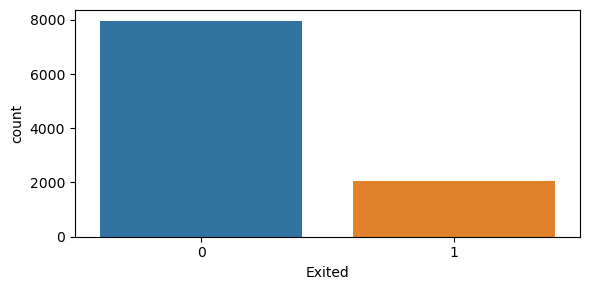

In [6]:
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 100
sns.countplot(x=y)
plt.tight_layout()

#### Data Visualization

In [7]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

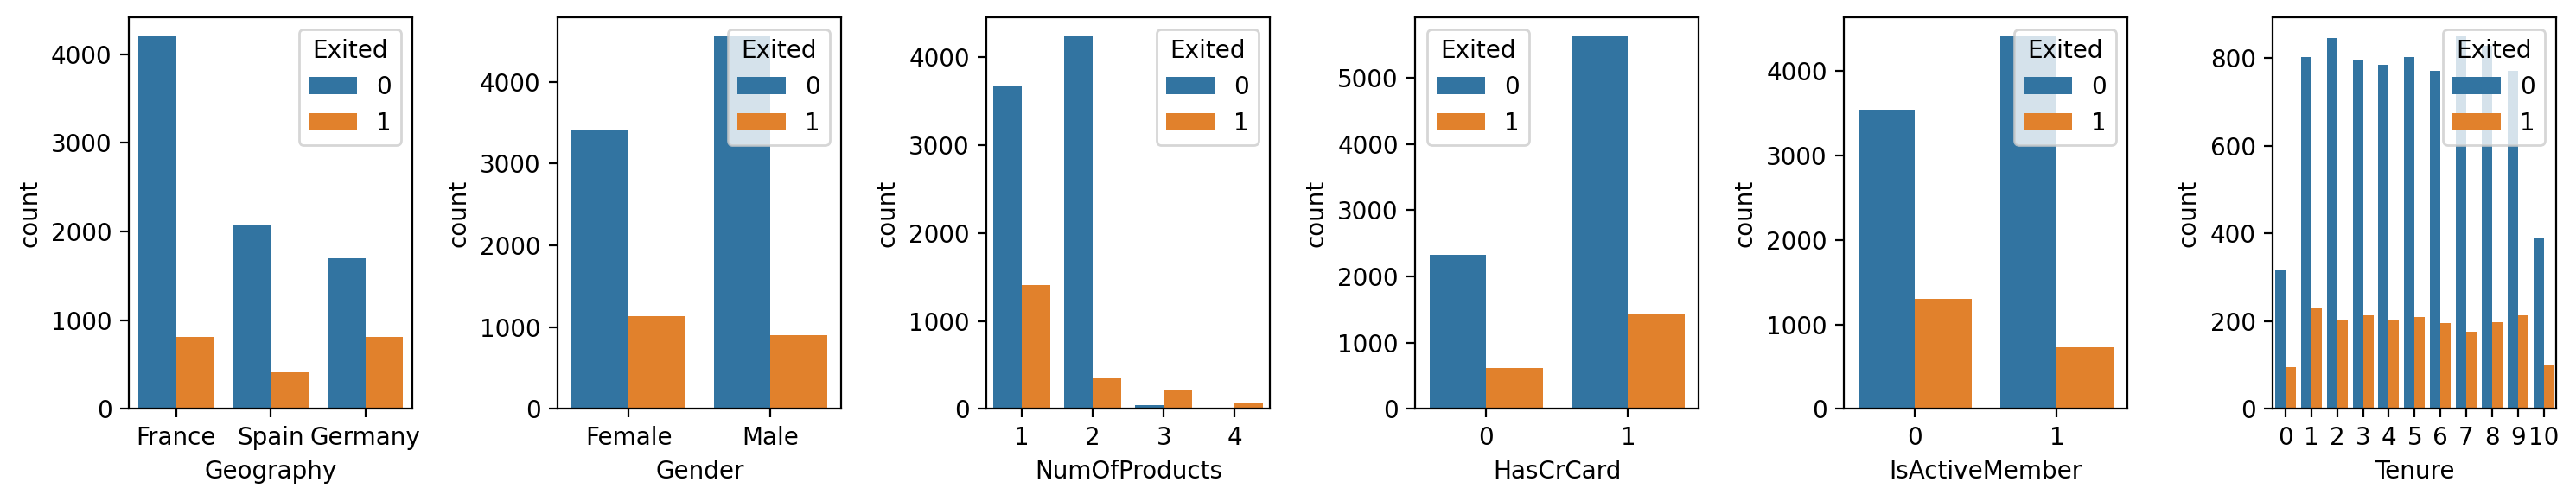

In [8]:
plt.rcParams['figure.figsize'] = (15,3)
plt.rcParams['figure.dpi'] = 200

fig,ax = plt.subplots(1,6)
sns.countplot(x='Geography', data=X, ax=ax[0], hue=y)
sns.countplot(x='Gender', data=X, ax=ax[1], hue=y)
sns.countplot(x='NumOfProducts', data=X, ax=ax[2], hue=y)
sns.countplot(x='HasCrCard', data=X, ax=ax[3], hue=y)
sns.countplot(x='IsActiveMember', data=X, ax=ax[4], hue=y)
sns.countplot(x='Tenure', data=X, ax=ax[5], hue=y)

plt.tight_layout()

#### PairPlot

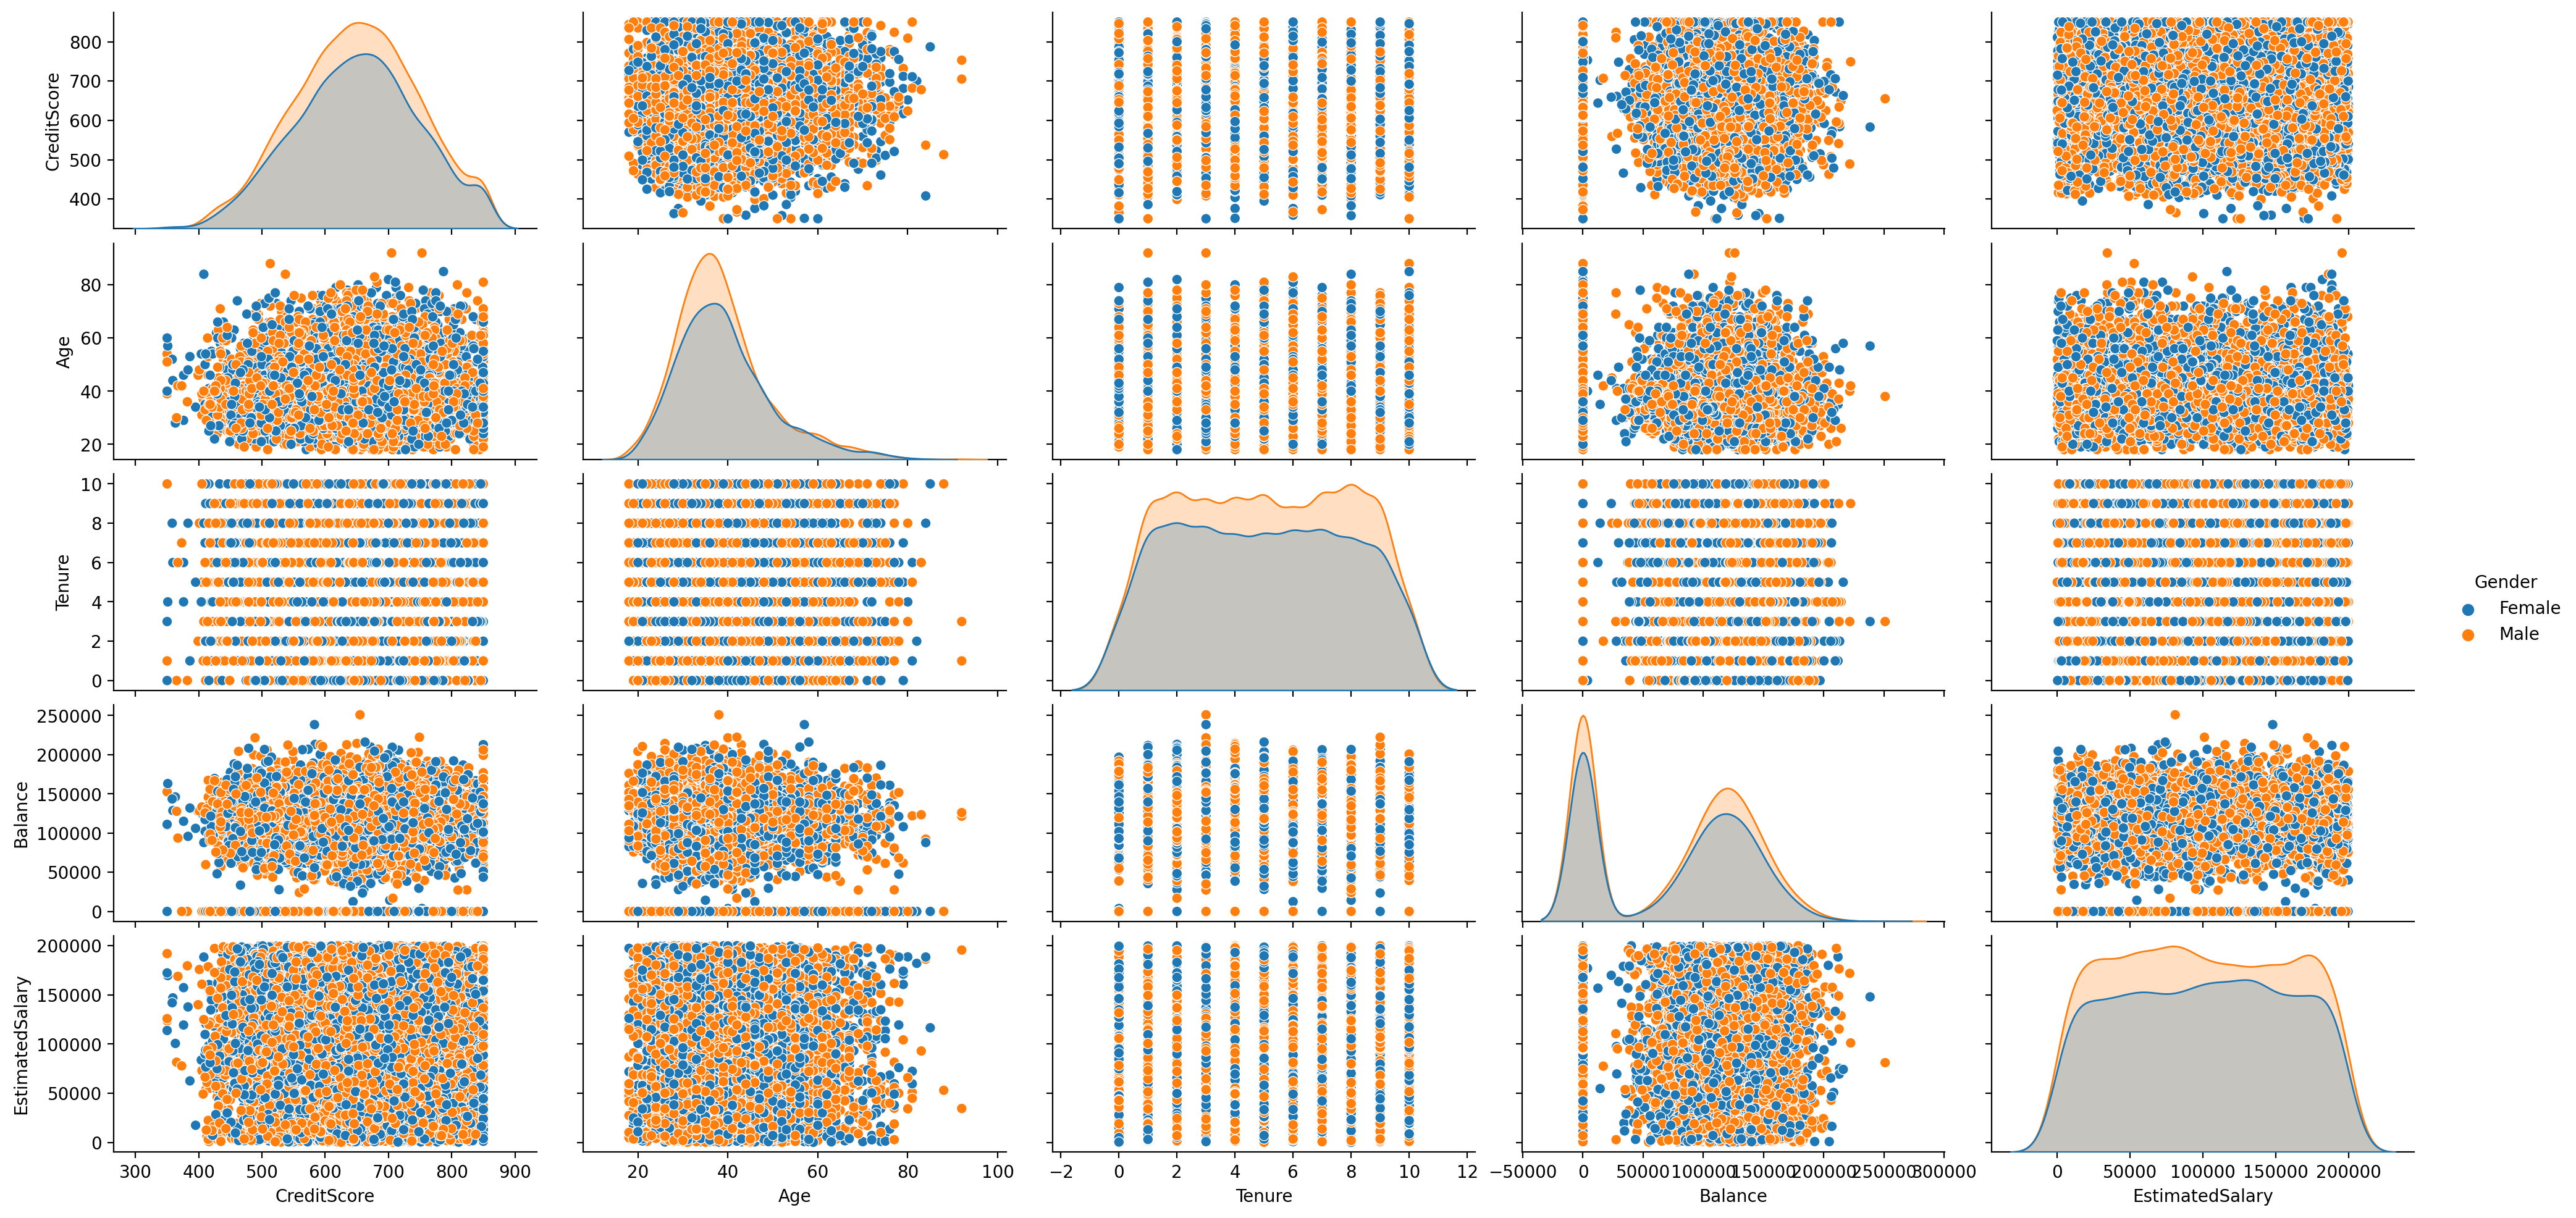

In [9]:
sns.pairplot(dataset, vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], height=2, aspect=2, hue='Gender')

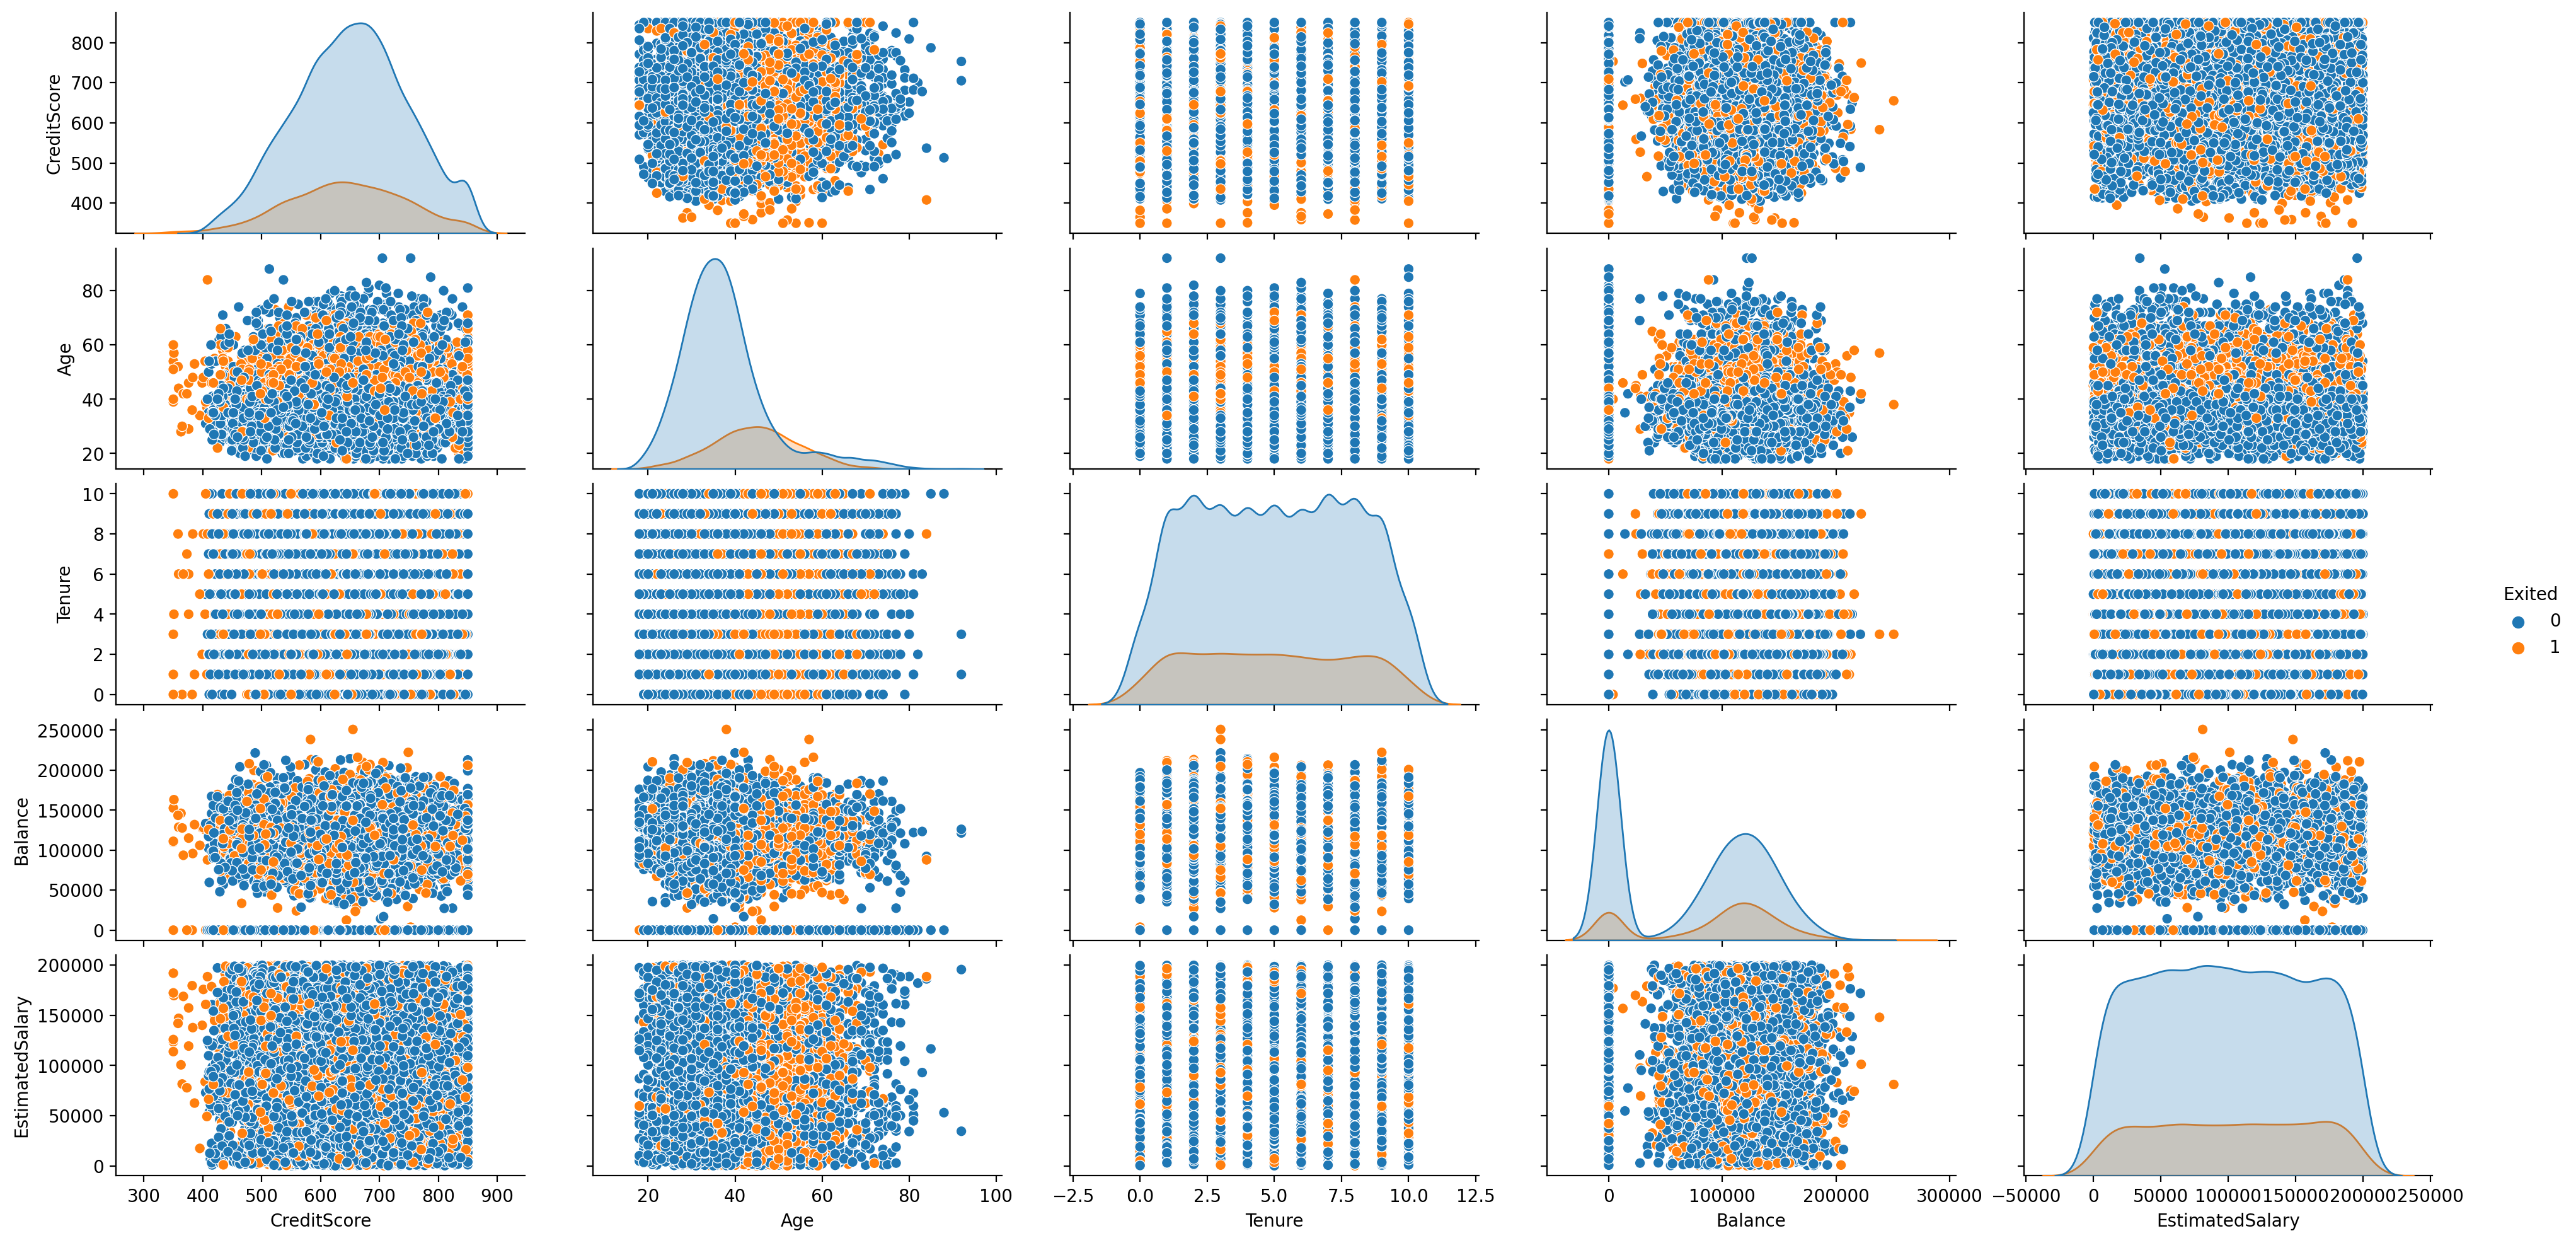

In [10]:
sns.pairplot(dataset, vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], height=2, aspect=2, hue='Exited')

##### Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [13]:
# categorical feature to numerical feature
# avoiding multicollinearity
X_onehot= pd.get_dummies(X, drop_first=True)  


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_onehot,y,test_size=0.2,random_state=42, stratify=y)

In [15]:
# X_train.describe()

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building Neural Network Model

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

##### class weight and input shape

In [18]:
input_shape = X_train.shape[1:]

In [19]:
#class weight
class_weight = y.value_counts().to_dict()
class_weight

{0: 7963, 1: 2037}

In [20]:
total_sample = sum(class_weight.values())

class_weight = [total_sample/(len(class_weight)*class_weight[0]),
total_sample/(len(class_weight)*class_weight[1])]

In [21]:
class_weight

[0.6279040562602034, 2.454590083456063]

##### Creating Model - Deep Neural Network (Hidden Layer)

In [22]:
model = Sequential() # API container (Sequencial API)
model.add(InputLayer(input_shape))

# 3 layers => neuron layer
model.add(Dense(128, activation='relu'))  # 128 =  number of neuron , dense = hidden layer/dense layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Summary Explanation

In [24]:
#input_shape*128
# 11

In [25]:
11*128 + 128, 128*128+128, 1*128+1

(1536, 16512, 129)

In [26]:
sum([11*128 + 128 , 128*128+128, 1*128+1])

# sum(11*output_shape + output_shape, 128*output_shape + output_shape, 1*output_shape + output_shape])

18177

#### Model Training